In [1]:
# Importing required libraries. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset. We also drop the 'Timestamp' variable because it gives us no information about the modelling.

data = pd.read_csv('data.csv')
data = data.drop(['Timestamp'], axis = 1)

In [3]:
# Let's look at the names of the columns. Since the source of the data is Turkey, it is likely that it will be in a local
# language.

data.columns

Index(['Cinsiyet', 'Yas', 'Bolge', 'Egitim', 'soru1', 'soru2', 'soru3',
       'soru4', 'soru5', 'soru6', 'soru7', 'soru8', 'soru9', 'soru10',
       'parti'],
      dtype='object')

In [4]:
# We will now rename the columns to English language.

names = ["Sex","Age","Region","Education","Economy_Status_Good?","Need_Education_Reform?",
         "Privatization?","Support_Death_Penalty?","Journalists_Neutral_Enough?","Alcohol_Prohibition_After_10pm?",
         "Support_Secular_State?","Support_Abortion_Ban?","Extraordinary_State_Restricts_Freedom?","Want_New_Party?",
         "Which_Party_Do_You_Support?"]
data = data.rename(columns=dict(zip(data.columns, names)))

In [5]:
# We now have columns name in English. 

data.columns

Index(['Sex', 'Age', 'Region', 'Education', 'Economy_Status_Good?',
       'Need_Education_Reform?', 'Privatization?', 'Support_Death_Penalty?',
       'Journalists_Neutral_Enough?', 'Alcohol_Prohibition_After_10pm?',
       'Support_Secular_State?', 'Support_Abortion_Ban?',
       'Extraordinary_State_Restricts_Freedom?', 'Want_New_Party?',
       'Which_Party_Do_You_Support?'],
      dtype='object')

In [6]:
# Let's check the number of records in our dataset.

data.shape

(168, 15)

In [7]:
# We now want to see how many distinct parties (with their frequency) are there.

data['Which_Party_Do_You_Support?'].value_counts()

IYI PARTI    44
CHP          43
DIĞER        41
AKP          32
HDP           5
MHP           3
Name: Which_Party_Do_You_Support?, dtype: int64

In [8]:
# We can see that most records are for 4 parties; 'IYI PARTI', 'CHP', 'DIĞER' and 'AKP'. So, we filter out the records
# corresponding to 'HDP' or 'MHP', because we don't have enough records to make any inference about them.

data = data[(data['Which_Party_Do_You_Support?'] == 'IYI PARTI') | (data['Which_Party_Do_You_Support?'] == 'CHP') | 
            (data['Which_Party_Do_You_Support?'] == 'DIĞER') | (data['Which_Party_Do_You_Support?'] == 'AKP')]

In [9]:
# Let's look at our data.

data.head()

Sex    Age   Region  Education Economy_Status_Good?  \
0  Erkek  18-30  Marmara     Lisans                Hayır   
1  Erkek  18-30  Marmara     Lisans                 Evet   
2  Kadın  18-30  Marmara     Lisans                Hayır   
3  Erkek   0-18  Marmara       Lise                 Evet   
4  Erkek  18-30  Marmara  Ön Lisans                Hayır   

  Need_Education_Reform? Privatization? Support_Death_Penalty?  \
0                   Evet           Evet                  Hayır   
1                   Evet          Hayır                   Evet   
2                   Evet          Hayır                  Hayır   
3                   Evet          Hayır                   Evet   
4                   Evet           Evet                   Evet   

  Journalists_Neutral_Enough? Alcohol_Prohibition_After_10pm?  \
0                       Hayır                           Hayır   
1                       Hayır                            Evet   
2                       Hayır                           Hayır   
3                       Hayır                            Evet   
4                       Hayır                           Hayır   

  Support_Secular_State? Support_Abortion_Ban?  \
0                   Evet                 Hayır   
1                  Hayır                  Evet   
2                   Evet                 Hayır   
3                   Evet                  Evet   
4                   Evet                  Evet   

  Extraordinary_State_Restricts_Freedom? Want_New_Party?  \
0                                   Evet            Evet   
1                                  Hayır           Hayır   
2                                   Evet            Evet   
3                                   Evet            Evet   
4                                  Hayır           Hayır   

  Which_Party_Do_You_Support?  
0                   IYI PARTI  
1                         AKP  
2                       DIĞER  
3                   IYI PARTI  
4                   IYI PARTI

# Data PreProcessing

In [10]:
# We now want to check if our data has any NULL or missing values.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 167
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Sex                                     160 non-null    object
 1   Age                                     160 non-null    object
 2   Region                                  160 non-null    object
 3   Education                               160 non-null    object
 4   Economy_Status_Good?                    160 non-null    object
 5   Need_Education_Reform?                  160 non-null    object
 6   Privatization?                          160 non-null    object
 7   Support_Death_Penalty?                  160 non-null    object
 8   Journalists_Neutral_Enough?             160 non-null    object
 9   Alcohol_Prohibition_After_10pm?         160 non-null    object
 10  Support_Secular_State?                  160 non-null    object
 11  Suppor

In [11]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

Total    %
Which_Party_Do_You_Support?                 0  0.0
Want_New_Party?                             0  0.0
Extraordinary_State_Restricts_Freedom?      0  0.0
Support_Abortion_Ban?                       0  0.0
Support_Secular_State?                      0  0.0
Alcohol_Prohibition_After_10pm?             0  0.0
Journalists_Neutral_Enough?                 0  0.0
Support_Death_Penalty?                      0  0.0
Privatization?                              0  0.0
Need_Education_Reform?                      0  0.0
Economy_Status_Good?                        0  0.0
Education                                   0  0.0
Region                                      0  0.0
Age                                         0  0.0
Sex                                         0  0.0

In [12]:
# We can see that there are no NULL or missing values in our dataset.

In [13]:
# Now, we convert the categorical (object) type columns to numerical (int) type.

In [14]:
# The Evet/Hayır type questionnaire columns.

opinions = {"Hayır": 0, "Evet": 1}

for col in data.columns[4:14]:
    data[col] = data[col].map(opinions)

In [15]:
# 'Sex' variable.

data['Sex'].value_counts()

Erkek    131
Kadın     29
Name: Sex, dtype: int64

In [16]:
sex = {"Erkek": 0, "Kadın": 1}
data['Sex'] = data['Sex'].map(sex)

In [17]:
# 'Region' variable.

data['Region'].value_counts()

Marmara         93
Ege             20
Akdeniz         17
İç Anadolu      14
Karadeniz        7
Güneydoğu        5
Doğu Anadolu     4
Name: Region, dtype: int64

In [18]:
regions = {"Marmara": 1, "Ege": 2, "Akdeniz": 3, "İç Anadolu": 4, "Karadeniz": 5, "Güneydoğu": 6, "Doğu Anadolu": 7}
data['Region'] = data['Region'].map(regions)

In [19]:
# 'Age' variable.

data['Age'].value_counts()

18-30    101
0-18      39
30-50     17
60+        2
50-60      1
Name: Age, dtype: int64

In [20]:
age_groups = {"0-18": 1, "18-30": 2, "30-50": 3, "50-60": 4, "60+": 5}
data['Age'] = data['Age'].map(age_groups)

In [21]:
# 'Education' variable.

data['Education'].value_counts()

Lisans         78
Lise           54
Ön Lisans      11
Lisans Üstü    10
Ortaokul        4
İlkokul         3
Name: Education, dtype: int64

In [22]:
# İlkokul = Primary School
# OrtaOkul = Middle School
# Lise = High School
# Lisans = License
# Ön Lisans = Undergraduate (bachelor's)
# Lisans Üstü = Graduate (master's)

In [23]:
education_levels = {"İlkokul": 1, "Ortaokul": 2, "Lise": 3, "Lisans": 4, "Ön Lisans": 5, "Lisans Üstü": 6}
data['Education'] = data['Education'].map(education_levels)

In [24]:
# 'Which_Party_Do_You_Support?' variable.

data['Which_Party_Do_You_Support?'].value_counts()

IYI PARTI    44
CHP          43
DIĞER        41
AKP          32
Name: Which_Party_Do_You_Support?, dtype: int64

In [25]:
parties = {"IYI PARTI": 1, "CHP": 2, "DIĞER": 3, "AKP": 4}
data['Which_Party_Do_You_Support?'] = data['Which_Party_Do_You_Support?'].map(parties)

In [26]:
# Now let's look at the data again.

data.head()

Sex  Age  Region  Education  Economy_Status_Good?  Need_Education_Reform?  \
0    0    2       1          4                     0                       1   
1    0    2       1          4                     1                       1   
2    1    2       1          4                     0                       1   
3    0    1       1          3                     1                       1   
4    0    2       1          5                     0                       1   

   Privatization?  Support_Death_Penalty?  Journalists_Neutral_Enough?  \
0               1                       0                            0   
1               0                       1                            0   
2               0                       0                            0   
3               0                       1                            0   
4               1                       1                            0   

   Alcohol_Prohibition_After_10pm?  Support_Secular_State?  \
0                                0                       1   
1                                1                       0   
2                                0                       1   
3                                1                       1   
4                                0                       1   

   Support_Abortion_Ban?  Extraordinary_State_Restricts_Freedom?  \
0                      0                                       1   
1                      1                                       0   
2                      0                                       1   
3                      1                                       1   
4                      1                                       0   

   Want_New_Party?  Which_Party_Do_You_Support?  
0                1                            1  
1                0                            4  
2                1                            3  
3                1                            1  
4                0                            1

In [27]:
data.describe()

Sex         Age      Region   Education  Economy_Status_Good?  \
count  160.000000  160.000000  160.000000  160.000000            160.000000   
mean     0.181250    1.912500    2.081250    3.750000              0.400000   
std      0.386435    0.694882    1.601775    0.931625              0.491436   
min      0.000000    1.000000    1.000000    1.000000              0.000000   
25%      0.000000    2.000000    1.000000    3.000000              0.000000   
50%      0.000000    2.000000    1.000000    4.000000              0.000000   
75%      0.000000    2.000000    3.000000    4.000000              1.000000   
max      1.000000    5.000000    7.000000    6.000000              1.000000   

       Need_Education_Reform?  Privatization?  Support_Death_Penalty?  \
count               160.00000      160.000000               160.00000   
mean                  0.96250        0.518750                 0.50000   
std                   0.19058        0.501217                 0.50157   
min                   0.00000        0.000000                 0.00000   
25%                   1.00000        0.000000                 0.00000   
50%                   1.00000        1.000000                 0.50000   
75%                   1.00000        1.000000                 1.00000   
max                   1.00000        1.000000                 1.00000   

       Journalists_Neutral_Enough?  Alcohol_Prohibition_After_10pm?  \
count                    160.00000                       160.000000   
mean                       0.03750                         0.356250   
std                        0.19058                         0.480394   
min                        0.00000                         0.000000   
25%                        0.00000                         0.000000   
50%                        0.00000                         0.000000   
75%                        0.00000                         1.000000   
max                        1.00000                         1.000000   

       Support_Secular_State?  Support_Abortion_Ban?  \
count              160.000000             160.000000   
mean                 0.793750               0.362500   
std                  0.405882               0.482231   
min                  0.000000               0.000000   
25%                  1.000000               0.000000   
50%                  1.000000               0.000000   
75%                  1.000000               1.000000   
max                  1.000000               1.000000   

       Extraordinary_State_Restricts_Freedom?  Want_New_Party?  \
count                              160.000000       160.000000   
mean                                 0.756250         0.800000   
std                                  0.430692         0.401256   
min                                  0.000000         0.000000   
25%                                  1.000000         1.000000   
50%                                  1.000000         1.000000   
75%                                  1.000000         1.000000   
max                                  1.000000         1.000000   

       Which_Party_Do_You_Support?  
count                   160.000000  
mean                      2.381250  
std                       1.092409  
min                       1.000000  
25%                       1.000000  
50%                       2.000000  
75%                       3.000000  
max                       4.000000

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 167
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Sex                                     160 non-null    int64
 1   Age                                     160 non-null    int64
 2   Region                                  160 non-null    int64
 3   Education                               160 non-null    int64
 4   Economy_Status_Good?                    160 non-null    int64
 5   Need_Education_Reform?                  160 non-null    int64
 6   Privatization?                          160 non-null    int64
 7   Support_Death_Penalty?                  160 non-null    int64
 8   Journalists_Neutral_Enough?             160 non-null    int64
 9   Alcohol_Prohibition_After_10pm?         160 non-null    int64
 10  Support_Secular_State?                  160 non-null    int64
 11  Support_Abortion_Ba

In [29]:
# We can see that all our columns are now 'int' types.

# Data Visualization

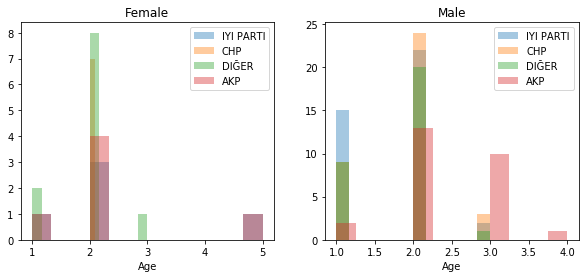

In [30]:
party1 = 'IYI PARTI'
party2 = 'CHP'
party3 = 'DIĞER'
party4 = 'AKP'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
women = data[data['Sex']==1]
men = data[data['Sex']==0]
ax = sns.distplot(women[women['Which_Party_Do_You_Support?']==1].Age.dropna(), bins=12, label = party1, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Which_Party_Do_You_Support?']==2].Age.dropna(), bins=12, label = party2, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Which_Party_Do_You_Support?']==3].Age.dropna(), bins=12, label = party3, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Which_Party_Do_You_Support?']==4].Age.dropna(), bins=12, label = party4, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Which_Party_Do_You_Support?']==1].Age.dropna(), bins=12, label = party1, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Which_Party_Do_You_Support?']==2].Age.dropna(), bins=12, label = party2, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Which_Party_Do_You_Support?']==3].Age.dropna(), bins=12, label = party3, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Which_Party_Do_You_Support?']==4].Age.dropna(), bins=12, label = party4, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [31]:
# We can notice that there are clearly more male respondents to this survey.
# The Age group '18-30' is the most active age group across both genders.
# Within the Age group '18-30', most males support the 'CHP' party, while female support the 'DIĞER' party.

In [32]:
party1 = 'IYI PARTI'
party2 = 'CHP'
party3 = 'DIĞER'
party4 = 'AKP'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
women = data[data['Sex']==1]
men = data[data['Sex']==0]
ax = sns.distplot(women[women['Which_Party_Do_You_Support?']==1].Education.dropna(), bins=12, label = party1, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Which_Party_Do_You_Support?']==2].Education.dropna(), bins=12, label = party2, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Which_Party_Do_You_Support?']==3].Education.dropna(), bins=12, label = party3, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Which_Party_Do_You_Support?']==4].Education.dropna(), bins=12, label = party4, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Which_Party_Do_You_Support?']==1].Education.dropna(), bins=12, label = party1, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Which_Party_Do_You_Support?']==2].Education.dropna(), bins=12, label = party2, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Which_Party_Do_You_Support?']==3].Education.dropna(), bins=12, label = party3, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Which_Party_Do_You_Support?']==4].Education.dropna(), bins=12, label = party4, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [33]:
# Among female, the Education level of 'License' is the most active age group. While among male, the Education level of
# 'High School' and 'License' are equally active in the survey.
# Within the Education level 'License', most males support the 'IYI PARTI' party, while female support the 'DIĞER' party.

In [34]:
# For visualizing how different political views vary across supporters of different parties, please visit the link given below. 
# I developed this cool interactive Tableau dashboard which depicts the dynamics of political views across different
# party's supporters in Turkey.

https://public.tableau.com/profile/ravinder3658#!/vizhome/Turkish_Political_Analysis/PoliticalViewsacrossPartysSupporters?publish=yes

In [35]:
# We well now look at the correlations between various variables involved.

import seaborn as sns

plt.subplots(figsize=(15, 15))
top_corr_features = data.corr().index
sns.heatmap(data[top_corr_features].corr(), cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=names, xticklabels=names)

In [36]:
# There doesn't seems to be a problem of strong collinearity among the predictor variables. 

# Building ML Models

In [37]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Accuracy Metric
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [38]:
# Now, we split our data into training and testing data.

In [39]:
from sklearn.model_selection import train_test_split

X = data.drop(['Which_Party_Do_You_Support?'], axis=1)
Y = data['Which_Party_Do_You_Support?']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, random_state= 0)

In [40]:
# Stochastic Gradient Descent (SGD) learning

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)

acc_sgd_train = round(sgd.score(X_train, Y_train) * 100, 2)
print(round(acc_sgd_train,2,), "%")

Y_pred = sgd.predict(X_test)
acc_sgd_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_sgd_test,2,), "%")

cv_scores_sgd = cross_val_score(sgd, X, Y, cv=20)*100
print(round(np.mean(cv_scores_sgd),2),'%')

39.47 %
62.5 %
34.38 %


In [41]:
# Random Forest

random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

acc_random_forest_train = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest_train,2,), "%")

Y_pred = random_forest.predict(X_test)
acc_random_forest_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_random_forest_test,2,), "%")

cv_scores_random_forest = cross_val_score(random_forest, X, Y, cv=20)*100
print(round(np.mean(cv_scores_random_forest),2),'%')

91.45 %
75.0 %
46.88 %


In [42]:
# Logistic Regression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

acc_log_train = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log_train,2,), "%")

Y_pred = logreg.predict(X_test)
acc_log_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_log_test,2,), "%")

cv_scores_log = cross_val_score(logreg, X, Y, cv=20)*100
print(round(np.mean(cv_scores_log),2),'%')

50.0 %
75.0 %
39.38 %


In [43]:
# K-Nearest Neighbour

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

acc_knn_train = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn_train,2,), "%")

Y_pred = knn.predict(X_test)
acc_knn_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_knn_test,2,), "%")

cv_scores_knn = cross_val_score(knn, X, Y, cv=20)*100
print(round(np.mean(cv_scores_knn),2),'%')

68.42 %
62.5 %
37.5 %


In [44]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

acc_gaussian_train = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian_train,2,), "%")

Y_pred = random_forest.predict(X_test)
acc_gaussian_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_gaussian_test,2,), "%")

cv_scores_gaussian = cross_val_score(gaussian, X, Y, cv=20)*100
print(round(np.mean(cv_scores_gaussian),2),'%')

42.11 %
75.0 %
32.5 %


In [45]:
# Perceptron

perceptron = Perceptron(max_iter=100)
perceptron.fit(X_train, Y_train)

acc_perceptron_train = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron_train,2,), "%")

Y_pred = random_forest.predict(X_test)
acc_perceptron_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_perceptron_test,2,), "%")

cv_scores_perceptron = cross_val_score(perceptron, X, Y, cv=20)*100
print(round(np.mean(cv_scores_perceptron),2),'%')

40.79 %
75.0 %
35.62 %


In [46]:
# Linear SVC

linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train, Y_train)

acc_linear_svc_train = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc_train,2,), "%")

Y_pred = random_forest.predict(X_test)
acc_linear_svc_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_linear_svc_test,2,), "%")

cv_scores_linear_svc = cross_val_score(linear_svc, X, Y, cv=20)*100
print(round(np.mean(cv_scores_linear_svc),2),'%')

50.66 %
75.0 %
40.62 %


In [47]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

acc_decision_tree_train = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree_train,2,), "%")

Y_pred = random_forest.predict(X_test)
acc_decision_tree_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_decision_tree_test,2,), "%")

cv_scores_decision_tree = cross_val_score(decision_tree, X, Y, cv=20)*100
print(round(np.mean(cv_scores_decision_tree),2),'%')

91.45 %
75.0 %
42.5 %


In [48]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score_train': [acc_linear_svc_train, acc_knn_train, acc_log_train, 
              acc_random_forest_train, acc_gaussian_train, acc_perceptron_train, 
              acc_sgd_train, acc_decision_tree_train],
    'Score_test': [acc_linear_svc_test, acc_knn_test, acc_log_test, 
              acc_random_forest_test, acc_gaussian_test, acc_perceptron_test, 
              acc_sgd_test, acc_decision_tree_test],
    'Score_mean20CV': [np.mean(cv_scores_linear_svc), np.mean(cv_scores_knn), np.mean(cv_scores_log), 
              np.mean(cv_scores_random_forest), np.mean(cv_scores_gaussian), np.mean(cv_scores_perceptron), 
              np.mean(cv_scores_sgd), np.mean(cv_scores_decision_tree)]})
result_df = results.sort_values(by='Score_mean20CV', ascending=False)
result_df = result_df.set_index('Score_mean20CV')
result_df.head(9)

Model  Score_train  Score_test
Score_mean20CV                                                     
46.875                       Random Forest        91.45        75.0
42.500                       Decision Tree        91.45        75.0
40.625             Support Vector Machines        50.66        75.0
39.375                 Logistic Regression        50.00        75.0
37.500                                 KNN        68.42        62.5
35.625                          Perceptron        40.79        75.0
34.375          Stochastic Gradient Decent        39.47        62.5
32.500                         Naive Bayes        42.11        75.0

In [49]:
# We can see that the Random Forest performs the best among all models we fit, across different types of accuracy scores.

In [50]:
# So, we will choose it as our final model.

In [51]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [52]:
importances

importance
feature                                           
Region                                       0.160
Education                                    0.105
Age                                          0.095
Extraordinary_State_Restricts_Freedom?       0.086
Economy_Status_Good?                         0.082
Support_Death_Penalty?                       0.077
Alcohol_Prohibition_After_10pm?              0.074
Support_Abortion_Ban?                        0.073
Privatization?                               0.069
Sex                                          0.055
Support_Secular_State?                       0.055
Want_New_Party?                              0.051
Journalists_Neutral_Enough?                  0.009
Need_Education_Reform?                       0.008

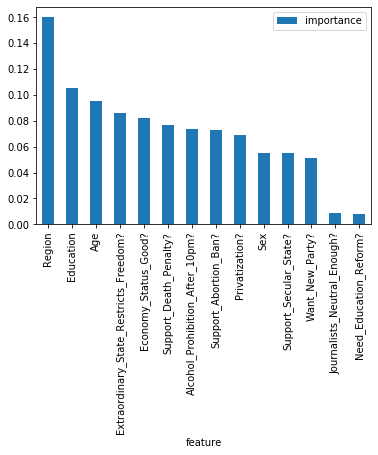

In [53]:
importances.plot.bar()

In [54]:
# We can see that variables 'Journalists_Neutral_Enough?' and 'Need_Education_Reform?' has very low feature importance. So, we
# are deciding to drop them, as they do not help much in decreasing the impurity of the classes.

In [55]:
X = X.drop("Journalists_Neutral_Enough?", axis=1)
X_train  = X_train.drop("Journalists_Neutral_Enough?", axis=1)
X_test  = X_test.drop("Journalists_Neutral_Enough?", axis=1)

X = X.drop("Need_Education_Reform?", axis=1)
X_train  = X_train.drop("Need_Education_Reform?", axis=1)
X_test  = X_test.drop("Need_Education_Reform?", axis=1)

In [56]:
# Random Forest

random_forest = RandomForestClassifier(oob_score = True)
random_forest.fit(X_train, Y_train)

acc_random_forest_train = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest_train,2,), "%")

Y_pred = random_forest.predict(X_test)
acc_random_forest_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_random_forest_test,2,), "%")

cv_scores_random_forest = cross_val_score(random_forest, X, Y, cv=20)*100
print(round(np.mean(cv_scores_random_forest),2),'%')

91.45 %
75.0 %
46.25 %


In [57]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 40.129999999999995 %


# Hyperparameter Tuning

In [293]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [100, 400, 700, 1000]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=1,
                                   

In [361]:
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 400}

In [58]:
# Running a tuned Random Forest model

random_forest_tuned = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 4,   
                                       n_estimators=400, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest_tuned.fit(X_train, Y_train)
Y_pred = random_forest_tuned.predict(X_test)

print("accuracy on training set:", random_forest_tuned.score(X_train, Y_train)*100, "%")
print("accuracy on testing set:", accuracy_score(Y_test, Y_pred)*100, "%")

print("oob score:", round(random_forest_tuned.oob_score_, 4)*100, "%")

accuracy on training set: 89.47368421052632 %
accuracy on testing set: 75.0 %
oob score: 44.080000000000005 %


# Final Model Performance

In [177]:
# On training set

Y_train_pred = random_forest_tuned.predict(X_train)
class_names = ["IYI PARTI", "CHP", "DIĞER", "AKP"]

accuracy = accuracy_score(Y_train, Y_train_pred)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(Y_train,Y_train_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(Y_train, Y_train_pred, target_names=class_names))

Accuracy: 0.89


NameError: name 'confusion_matrix' is not defined

In [ ]:
# Predicting on the test set

Y_test_pred = random_forest_tuned.predict(X_test)

accuracy = accuracy_score(Y_test, Y_test_pred)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(Y_test,Y_test_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(Y_test, Y_test_pred, target_names=class_names))

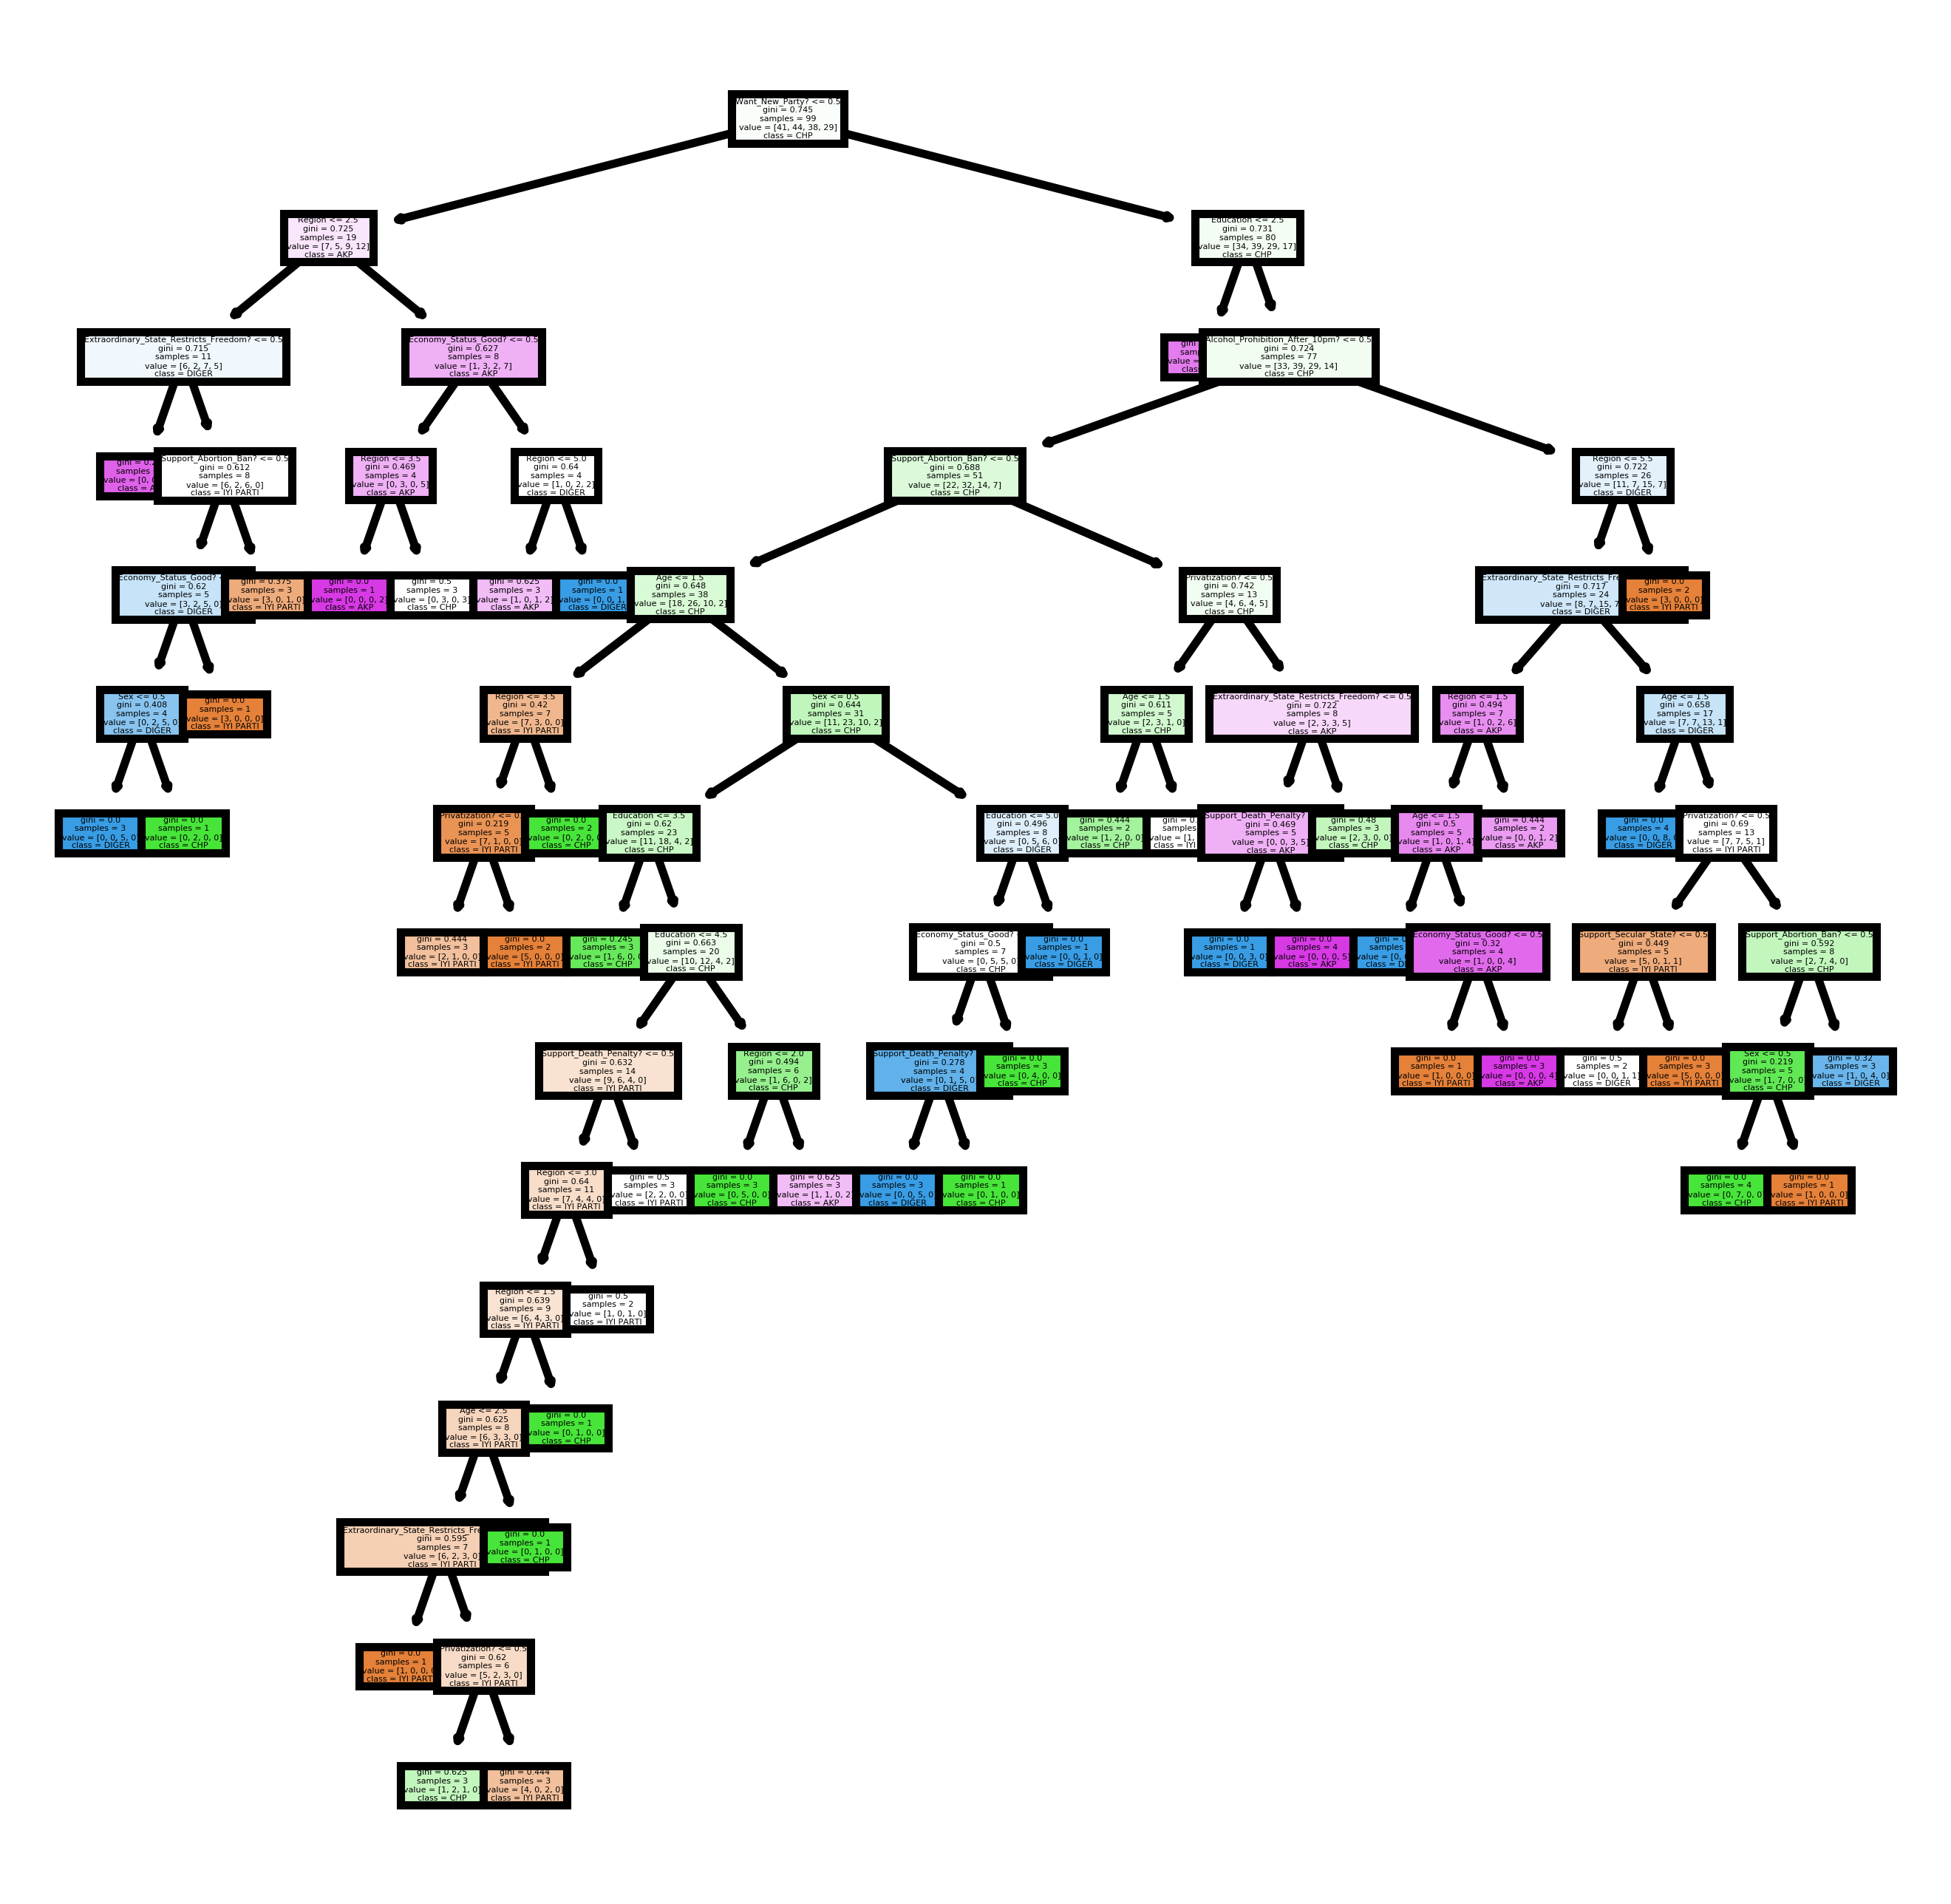

In [380]:
# Finally visualizing an individual decision tree from our final random forest.

from sklearn import tree

fn=["Sex","Age","Region","Education","Economy_Status_Good?","Privatization?","Support_Death_Penalty?",
                 "Alcohol_Prohibition_After_10pm?","Support_Secular_State?","Support_Abortion_Ban?",
                 "Extraordinary_State_Restricts_Freedom?","Want_New_Party?"]
cn=class_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(random_forest_tuned.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('random_forest_individual_decision_tree0.png')

In [379]:
# We can check the number of decision trees in our random forest. 

len(random_forest_tuned.estimators_)

400